<a href="https://colab.research.google.com/github/ashams62/colab_practice/blob/main/game_of_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [330]:
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from time import sleep
import random

In [331]:
size= int(input('what is the size?'))
universe = np.zeros((size,size))
for i in [random.randint(0,universe.shape[0]-1) for _ in range(size//2)]:
  for j in [random.randint(0,universe.shape[0]-1) for _  in range(size//2)]:
    universe[i,j]=1

what is the size?20


In [332]:
universe.shape

(20, 20)

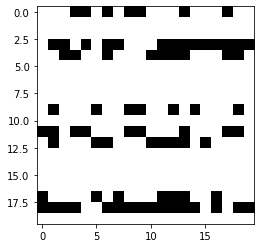

In [333]:
plt.imshow(universe, cmap="Greys")

In [334]:
def live_cell (cell: tuple , universe: np.array):
  lc=0
  for i in range (cell[0]-1, cell[0]+2):
    for j in range (cell[1]-1, cell[1]+2):
      if (i>=0) and (i<universe.shape[0]) and (j>=0) and (j<universe.shape[1]):
        if universe[i,j] == 1:
          lc= lc+1
      else:
        continue
  if universe[cell[0], cell[1]] == 1:
    lc=lc-1
  return lc

In [335]:
def neighbor_status (universe:np.array):
  no_live_neighbor= np.zeros(universe.shape)
  for i in range (0, universe.shape[0]):
    for j in range ( 0, universe.shape[1]):
      no_live_neighbor[i,j]= live_cell ((i,j), universe)
  return no_live_neighbor

In [336]:
# lc_map = neighbor_status(universe)
# plt.imshow(lc_map, cmap="jet")
# plt.colorbar()

In [337]:
def next_world (lc_map:np.array, universe: np.array):
    new_universe = np.zeros(lc_map.shape)
    for i in range (0, lc_map.shape[0]):
      for j in range ( 0, lc_map.shape[1]):
        if (universe[i,j] == 1) and (lc_map[i,j] == 2):
          new_universe[i,j] = 1
        if (universe[i,j] == 1) and (lc_map[i,j] == 3):
          new_universe[i,j] = 1
        if (universe[i,j] == 0) and (lc_map[i,j] == 3):
          new_universe[i,j] = 1
        else:
          new_universe[i,j] = 0
    return new_universe


In [338]:
# new_universe_2 = next_world(lc_map,universe)
# plt.imshow(new_universe_2, cmap="jet")
# plt.colorbar()

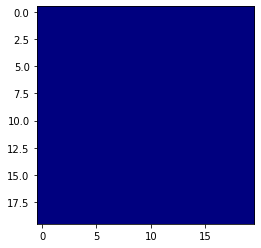

In [339]:
go= 1
while go > 0:
  lc_map = neighbor_status(universe)
  new_universe_2 = next_world(lc_map,universe)
  plt.imshow(new_universe_2, cmap="jet")
  plt.show()
  sleep(0.2)
  clear_output(wait=True)
  universe = new_universe_2
  go = 0
  for i in range (0, lc_map.shape[0]):
    for j in range (0, lc_map.shape[1]):
      if universe[i,j] != 0:
        go = go + 1